<a href="https://colab.research.google.com/github/damladmrk/YZABootcamp/blob/main/BootcampMain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Needed Libraries**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# **Train Test Split and Preparation for XGBoost**

In [4]:
df = pd.read_csv('cognitia_dataset.csv')
X = df.drop('Expert Diagnose', axis=1)
y_pre = df['Expert Diagnose']
df.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,3,1,2,2,1,1,0,0,1,0,0,1,1,1,3.0,3.0,4.0,Bipolar Type-2
1,3,1,3,2,0,1,0,0,0,0,0,0,0,0,4.0,2.0,5.0,Depression
2,2,0,2,2,1,0,0,0,1,1,0,1,1,0,6.0,5.0,7.0,Bipolar Type-1
3,3,1,3,0,1,1,1,0,1,0,0,0,0,0,3.0,2.0,2.0,Bipolar Type-2
4,3,3,2,2,0,0,0,0,0,0,0,1,1,1,5.0,5.0,6.0,Normal


In [5]:
label_map = {
    'Normal': 0,
    'Depression': 1,
    'Bipolar Type-1': 2,
    'Bipolar Type-2': 3
}

y = y_pre.map(label_map)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=27)

# **Model and Parameters**

For our core classification task — interpreting psychological test results — we selected **XGBoost** (Extreme Gradient Boosting) due to the following key advantages:

### ✅ Advantages of XGBoost:

- **High Performance:** XGBoost is well-known for its speed and efficiency compared to other gradient boosting algorithms.
- **Regularization:** It supports L1 (Lasso) and L2 (Ridge) regularization, which helps in preventing overfitting — especially useful for psychological data with possible noise.
- **Feature Importance:** It provides intuitive tools to evaluate feature importance, which will help us interpret which questions have the most predictive value.
- **Parallelization:** Thanks to its tree boosting architecture, XGBoost can efficiently utilize CPU/GPU resources for faster training.


In [6]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

y_pred_defoult = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_defoult))
print("\nClassification Report:\n", classification_report(y_test, y_pred_defoult))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.875

Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         8
           2       1.00      0.62      0.77         8
           3       0.75      1.00      0.86         6

    accuracy                           0.88        24
   macro avg       0.85      0.91      0.86        24
weighted avg       0.91      0.88      0.87        24



**Key Parameters to Experiment With:**
   - `max_depth`: Controls tree complexity.
   - `learning_rate` (eta): Step size shrinkage to prevent overfitting.
   - `n_estimators`: Number of boosting rounds.
   - `subsample`: Randomly sample training data to avoid overfitting.
   - `colsample_bytree`: Fraction of features used per tree.
   - `gamma`: Minimum loss reduction to make a split.
   - `reg_alpha` and `reg_lambda`: Regularization terms

In [7]:
params_list = [
    {"max_depth": 3, "learning_rate": 0.1, "n_estimators": 100},
    {"max_depth": 4, "learning_rate": 0.1, "n_estimators": 100},
    {"max_depth": 3, "learning_rate": 0.05, "n_estimators": 150},
    {"max_depth": 7, "learning_rate": 0.4, "n_estimators": 140},
    {"max_depth": 6, "learning_rate": 0.2, "n_estimators": 100},
]

In [8]:
results = []

for i, params in enumerate(params_list):
    print(f"Model {i+1} training with params: {params}")
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', **params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results.append({
        "Model": f"Model {i+1}",
        "Params": params,
        "Accuracy": acc,
        "Precision_macro": report["macro avg"]["precision"],
        "Recall_macro": report["macro avg"]["recall"],
        "F1_macro": report["macro avg"]["f1-score"]
    })


Model 1 training with params: {'max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 100}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model 2 training with params: {'max_depth': 4, 'learning_rate': 0.1, 'n_estimators': 100}
Model 3 training with params: {'max_depth': 3, 'learning_rate': 0.05, 'n_estimators': 150}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model 4 training with params: {'max_depth': 7, 'learning_rate': 0.4, 'n_estimators': 140}
Model 5 training with params: {'max_depth': 6, 'learning_rate': 0.2, 'n_estimators': 100}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Model,Params,Accuracy,Precision_macro,Recall_macro,F1_macro
0,Model 1,"{'max_depth': 3, 'learning_rate': 0.1, 'n_esti...",0.791667,0.791667,0.833333,0.761905
1,Model 2,"{'max_depth': 4, 'learning_rate': 0.1, 'n_esti...",0.791667,0.781250,0.833333,0.761905
2,Model 3,"{'max_depth': 3, 'learning_rate': 0.05, 'n_est...",0.708333,0.739583,0.770833,0.684524
3,Model 4,"{'max_depth': 7, 'learning_rate': 0.4, 'n_esti...",0.833333,0.803571,0.864583,0.820879
4,Model 5,"{'max_depth': 6, 'learning_rate': 0.2, 'n_esti...",0.875000,0.854167,0.906250,0.856593


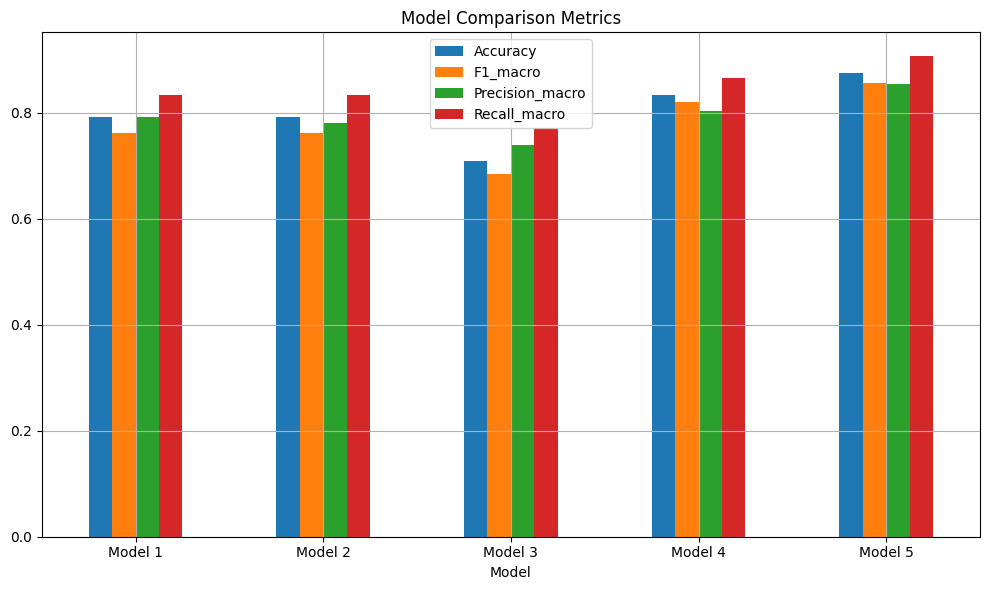

In [9]:
df_results = pd.DataFrame(results).reset_index(drop=True)

display(df_results)

df_results.plot(
    x="Model",
    y=["Accuracy", "F1_macro", "Precision_macro", "Recall_macro"],
    kind="bar",
    figsize=(10, 6),
    title="Model Comparison Metrics"
)

plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
best_params = params_list[4]
main_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', **best_params)
main_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [11]:
y_pred = main_model.predict(X_test)

print("Main Model (Model 4) Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Main Model (Model 4) Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         8
           2       1.00      0.62      0.77         8
           3       0.75      1.00      0.86         6

    accuracy                           0.88        24
   macro avg       0.85      0.91      0.86        24
weighted avg       0.91      0.88      0.87        24

Accuracy: 0.875


In [12]:
def predict_with_probabilities(model, input_dict, feature_columns, class_labels):
    """
    - model: Last XGBClassifier
    - input_dict: Features and values of extracted test {feature: value}
    - feature_columns: Ordered feature names
    - class_labels: Diagnosis labels (['Bipolar Type-1', 'Depression', ...])

    Returns: Probability distribution in the format of pandas Series
    """

    input_df = pd.DataFrame([input_dict])[feature_columns]

    probabilities = model.predict_proba(input_df)[0]

    result = pd.Series(probabilities, index=class_labels, name="Probability")

    return result.sort_values(ascending=False)

def plot_probabilities(probs_series):
    probs_series.plot(kind='bar', color='salmon', title="Diagnosis Probabilities")
    plt.ylabel("Probability")
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

feature_columns = [
    'Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder', 'Mood Swing', 'Suicidal thoughts',
    'Anorxia', 'Authority Respect', 'Try-Explanation', 'Aggressive Response', 'Ignore & Move-On',
    'Nervous Break-down', 'Admit Mistakes', 'Overthinking', 'Sexual Activity',
    'Concentration', 'Optimisim'
]
class_labels = ['Bipolar Type-1', 'Bipolar Type-2', 'Depression', 'Normal']

In [13]:
new_person = {
    'Sadness': 3, 'Euphoric': 2, 'Exhausted': 3, 'Sleep dissorder': 1,
    'Mood Swing': 0, 'Suicidal thoughts': 1, 'Anorxia': 0, 'Authority Respect': 0,
    'Try-Explanation': 1, 'Aggressive Response': 1, 'Ignore & Move-On': 0,
    'Nervous Break-down': 0, 'Admit Mistakes': 0, 'Overthinking': 1,
    'Sexual Activity': 4, 'Concentration': 6, 'Optimisim': 10
}

Bipolar Type-2    0.917072
Bipolar Type-1    0.057243
Depression        0.017113
Normal            0.008573
Name: Probability, dtype: float32


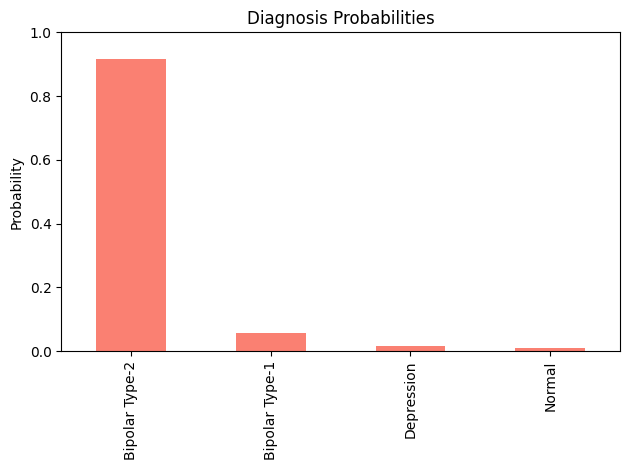

In [14]:
probs = predict_with_probabilities(main_model, new_person, feature_columns, class_labels)
print(probs)
plot_probabilities(probs)

# **Downloading the Model for the Website**

In [19]:
import joblib

joblib.dump(main_model, 'xgb_model.pkl')

['xgb_model.pkl']

In [20]:
main_model.save_model('xgb_model.pkl')


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:09:46] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


In [21]:
from google.colab import files

files.download('xgb_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>